In [1]:
import pandas as pd 
import os
import numpy as  np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
from sklearn.feature_selection import RFE

In [2]:
df = pd.read_parquet(r'C:\Users\manis\Downloads\yellow_tripdata_2024-03.parquet')
df.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2024-03-01 00:18:51,2024-03-01 00:23:45,0.0,1.3,1.0,N,142,239,1,8.6,3.5,0.5,2.7,0.0,1.0,16.3,2.5,0.0
1,1,2024-03-01 00:26:00,2024-03-01 00:29:06,0.0,1.1,1.0,N,238,24,1,7.2,3.5,0.5,3.0,0.0,1.0,15.2,2.5,0.0


In [3]:
df.shape

(3582628, 19)

In [4]:
df1 =df.sample(10000)
df1.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
879093,2,2024-03-09 14:41:15,2024-03-09 14:51:08,5.0,1.19,1.0,N,234,170,1,10.7,0.0,0.5,2.94,0.0,1.0,17.64,2.5,0.0
1897461,1,2024-03-19 13:26:10,2024-03-19 13:45:34,0.0,1.90,1.0,N,264,137,2,17.0,2.5,0.5,0.00,0.0,1.0,21.00,2.5,0.0


In [6]:
df1.to_csv('Yellow_Taxi_data.csv', index = False)

In [7]:
df1.shape

(10000, 19)

# EDA

In [8]:
df1['VendorID'].nunique()

3

In [9]:
df1['passenger_count'].nunique()

7

In [10]:
print(df1['RatecodeID'].nunique())
df1['RatecodeID'].value_counts()

6


RatecodeID
1.0     8278
2.0      335
99.0      97
5.0       57
3.0       32
4.0       17
Name: count, dtype: int64

In [11]:
df1['PULocationID'].nunique()

160

In [12]:
df1['payment_type'].nunique()

5

In [13]:
df1['fare_amount'].describe()

count    10000.000000
mean        18.767416
std         17.924701
min        -95.400000
25%          9.300000
50%         13.500000
75%         21.900000
max        388.000000
Name: fare_amount, dtype: float64

C:\Users\manis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


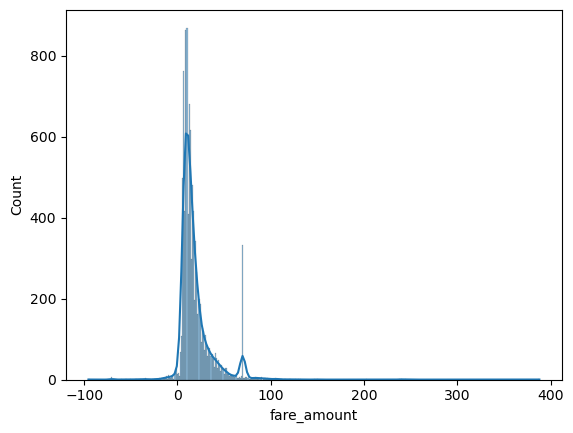

In [14]:
sns.histplot(df1['fare_amount'], kde = True)
plt.show()

In [15]:
df1['fare_amount'].skew()

3.3433928294197583

In [16]:
df1['fare_amount'].kurt()

33.04061395316581

In [17]:
df1.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [18]:
df2 = df1.drop(columns = ['extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 
                           'total_amount', 'congestion_surcharge', 'Airport_fee'])
df2.head(2)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount
879093,2,2024-03-09 14:41:15,2024-03-09 14:51:08,5.0,1.19,1.0,N,234,170,1,10.7
1897461,1,2024-03-19 13:26:10,2024-03-19 13:45:34,0.0,1.90,1.0,N,264,137,2,17.0


In [19]:
df2['trip_distance'].describe()

count    10000.000000
mean         3.272825
std          4.339110
min          0.000000
25%          1.000000
50%          1.740000
75%          3.300000
max         74.400000
Name: trip_distance, dtype: float64

In [20]:
corr = df2.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

ValueError: could not convert string to float: 'N'

# Missing Values treatment

In [21]:
df2.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          1184
trip_distance               0
RatecodeID               1184
store_and_fwd_flag       1184
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
dtype: int64

In [22]:
df2.dropna(inplace = True)

In [23]:
df2.shape

(8816, 11)

In [24]:
df2.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
dtype: int64

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8816 entries, 879093 to 2895439
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               8816 non-null   int32         
 1   tpep_pickup_datetime   8816 non-null   datetime64[us]
 2   tpep_dropoff_datetime  8816 non-null   datetime64[us]
 3   passenger_count        8816 non-null   float64       
 4   trip_distance          8816 non-null   float64       
 5   RatecodeID             8816 non-null   float64       
 6   store_and_fwd_flag     8816 non-null   object        
 7   PULocationID           8816 non-null   int32         
 8   DOLocationID           8816 non-null   int32         
 9   payment_type           8816 non-null   int64         
 10  fare_amount            8816 non-null   float64       
dtypes: datetime64[us](2), float64(4), int32(3), int64(1), object(1)
memory usage: 723.2+ KB


In [26]:
df2['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    8780
Y      36
Name: count, dtype: int64

### converting the object datatype to the numeral datatype

In [27]:
df2['store_and_fwd_flag'] = df2['store_and_fwd_flag'].apply(lambda x: 1 if x == 'Y' else 0)

In [28]:
df2['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
0    8780
1      36
Name: count, dtype: int64

In [29]:
stats.pointbiserialr(df2['store_and_fwd_flag'], df2['fare_amount'])   # there is no relationship between fare_Amount and store_and_fwd_flag
# we will be dropping this column 

SignificanceResult(statistic=-0.01295343975339541, pvalue=0.22393803675992566)

In [30]:
df2 = df2.drop(columns = ['store_and_fwd_flag'])

In [31]:
df2.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount'],
      dtype='object')

In [32]:
df2['VendorID'].value_counts()

VendorID
2    6690
1    2126
Name: count, dtype: int64

In [33]:
df2['pickup_hour'] = df2['tpep_pickup_datetime'].dt.hour
df2['pickup_minute'] = df2['tpep_pickup_datetime'].dt.minute
df2['pickup_day'] = df2['tpep_pickup_datetime'].dt.day
df2['pickup_month'] = df2['tpep_pickup_datetime'].dt.month
df2['trip_duration'] = (df2['tpep_dropoff_datetime'] - df2['tpep_pickup_datetime']).dt.total_seconds() / 60

In [34]:
df2.drop(columns = ['tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace = True)

In [35]:
df2.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount',
       'pickup_hour', 'pickup_minute', 'pickup_day', 'pickup_month',
       'trip_duration'],
      dtype='object')

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8816 entries, 879093 to 2895439
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         8816 non-null   int32  
 1   passenger_count  8816 non-null   float64
 2   trip_distance    8816 non-null   float64
 3   RatecodeID       8816 non-null   float64
 4   PULocationID     8816 non-null   int32  
 5   DOLocationID     8816 non-null   int32  
 6   payment_type     8816 non-null   int64  
 7   fare_amount      8816 non-null   float64
 8   pickup_hour      8816 non-null   int32  
 9   pickup_minute    8816 non-null   int32  
 10  pickup_day       8816 non-null   int32  
 11  pickup_month     8816 non-null   int32  
 12  trip_duration    8816 non-null   float64
dtypes: float64(5), int32(7), int64(1)
memory usage: 723.2 KB


In [37]:
df2.head(2)

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,pickup_hour,pickup_minute,pickup_day,pickup_month,trip_duration
879093,2,5.0,1.19,1.0,234,170,1,10.7,14,41,9,3,9.883333
1897461,1,0.0,1.90,1.0,264,137,2,17.0,13,26,19,3,19.400000


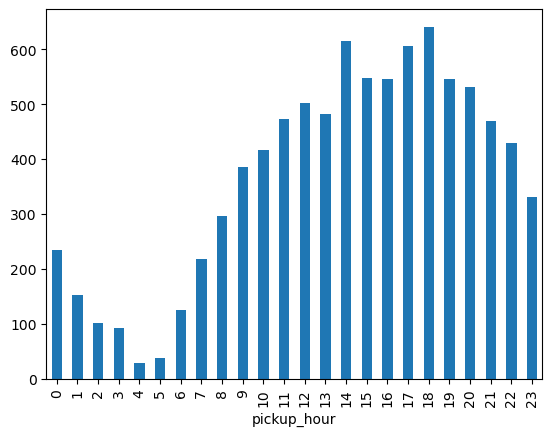

In [38]:
df2['pickup_hour'].value_counts().sort_index().plot(kind = 'bar')
plt.show()

# Outlier treatment

In [39]:
df2.describe(percentiles = [0.01, 0.02, 0.03, 0.97, 0.98, 0.99]).T

,count,mean,std,min,1%,2%,3%,50%,97%,98%,99%,max
VendorID,8816.0,1.758848,0.427807,1.0,1.000000,1.000000,1.00,2.000000,2.000000,2.000000,2.000000,2.000000
passenger_count,8816.0,1.349478,0.865960,0.0,0.000000,1.000000,1.00,1.000000,4.000000,4.000000,5.000000,6.000000
trip_distance,8816.0,3.338657,4.511224,0.0,0.000000,0.250000,0.34,1.700000,17.515500,18.340000,19.993500,74.400000
RatecodeID,8816.0,2.155172,10.223546,1.0,1.000000,1.000000,1.00,1.000000,2.000000,3.000000,99.000000,99.000000
PULocationID,8816.0,165.614678,62.767988,1.0,24.000000,43.000000,43.00,161.000000,262.000000,263.000000,263.000000,265.000000
DOLocationID,8816.0,165.549796,68.763575,1.0,10.000000,21.300000,40.00,163.000000,263.000000,263.000000,264.000000,265.000000
payment_type,8816.0,1.220054,0.551705,1.0,1.000000,1.000000,1.00,1.000000,2.000000,3.000000,4.000000,4.000000
fare_amount,8816.0,18.759676,18.626164,-95.4,-4.995000,3.700000,4.40,12.800000,70.000000,70.000000,75.695000,388.000000
pickup_hour,8816.0,14.306488,5.676352,0.0,0.000000,0.000000,1.00,15.000000,23.000000,23.000000,23.000000,23.000000
pickup_minute,8816.0,29.853108,17.345780,0.0,0.000000,1.000000,1.00,30.000000,57.000000,58.000000,59.000000,59.000000


In [40]:
df2['RatecodeID'].value_counts()

RatecodeID
1.0     8278
2.0      335
99.0      97
5.0       57
3.0       32
4.0       17
Name: count, dtype: int64

In [41]:
def outlier_method1(x):
    x = x.clip(upper = x.quantile(0.99))     # this calculate the 99 percentile and replace it 
    x = x.clip(lower = x.quantile(0.01))
    return x

In [42]:
df2 = df2.apply(outlier_method1)
df2.describe(percentiles = [0.01, 0.02, 0.03, 0.97, 0.98, 0.99]).T

,count,mean,std,min,1%,2%,3%,50%,97%,98%,99%,max
VendorID,8816.0,1.758848,0.427807,1.000000,1.000000,1.000000,1.00,2.000000,2.000000,2.000000,2.000000,2.000000
passenger_count,8816.0,1.341311,0.825844,0.000000,0.000000,1.000000,1.00,1.000000,4.000000,4.000000,5.000000,5.000000
trip_distance,8816.0,3.295156,4.251564,0.000000,0.000000,0.250000,0.34,1.700000,17.515500,18.340000,19.979475,19.993500
RatecodeID,8816.0,2.155172,10.223546,1.000000,1.000000,1.000000,1.00,1.000000,2.000000,3.000000,99.000000,99.000000
PULocationID,8816.0,165.718920,62.501722,24.000000,24.000000,43.000000,43.00,161.000000,262.000000,263.000000,263.000000,263.000000
DOLocationID,8816.0,165.602201,68.627654,10.000000,10.000000,21.300000,40.00,163.000000,263.000000,263.000000,264.000000,264.000000
payment_type,8816.0,1.220054,0.551705,1.000000,1.000000,1.000000,1.00,1.000000,2.000000,3.000000,4.000000,4.000000
fare_amount,8816.0,18.624865,16.327971,-4.995000,-4.905750,3.700000,4.40,12.800000,70.000000,70.000000,75.605750,75.695000
pickup_hour,8816.0,14.306488,5.676352,0.000000,0.000000,0.000000,1.00,15.000000,23.000000,23.000000,23.000000,23.000000
pickup_minute,8816.0,29.853108,17.345780,0.000000,0.000000,1.000000,1.00,30.000000,57.000000,58.000000,59.000000,59.000000


In [43]:
df2.drop(columns = ['pickup_month'], inplace = True)
df2.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount',
       'pickup_hour', 'pickup_minute', 'pickup_day', 'trip_duration'],
      dtype='object')

In [44]:
df2['PULocationID'].nunique()

130

In [45]:
df2['DOLocationID'].nunique()

202

C:\Users\manis\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


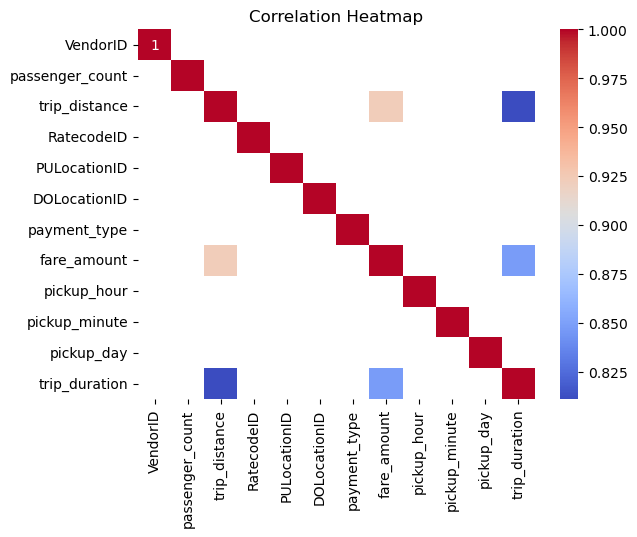

In [46]:
corr = df2.corr()
corr = corr[abs(corr)> 0.7]
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\manis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


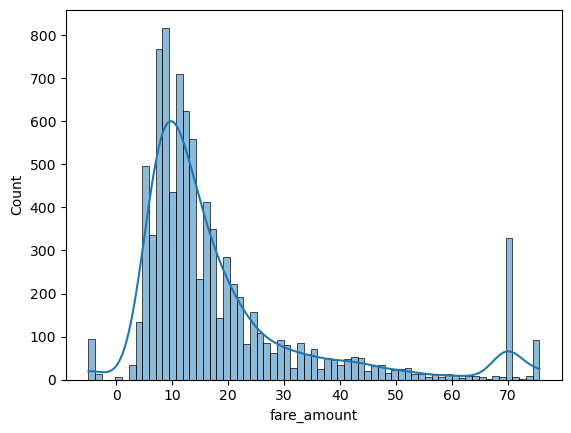

In [47]:
sns.histplot(df2['fare_amount'], kde = True)
plt.show()

In [48]:
df2['fare_amount'].skew()

1.9815579612136125

In [49]:
y = df2['fare_amount']
x = df2.drop(columns = ['fare_amount'])

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 77)

In [51]:
LR = LinearRegression()

In [52]:
LR.fit(x_train, y_train)

LinearRegression()

In [53]:
pred_train = LR.predict(x_train)
pred_test = LR.predict(x_test)

In [54]:
train_mse = metrics.mean_squared_error(y_train, pred_train)
print(f'train MSE: {train_mse}')

train MSE: 31.532931121404044


In [55]:
test_mse =metrics.mean_squared_error(y_test, pred_test)
print(f'test MSE: {test_mse}')

test MSE: 27.957846334619113


In [56]:
train_r2 =metrics.r2_score(y_train, pred_train)
print(f'train R2: {train_r2}')

train R2: 0.8821771690868987


In [57]:
test_r2= metrics.r2_score(y_test, pred_test)
print(f'test R2: {test_r2}')

test R2: 0.8941174919956811


## Feature Selection

In [58]:
LR1 = LinearRegression()
LR1.fit(x_train, y_train)
rfe = RFE(LR1, n_features_to_select = 9, verbose = 3)
rfe = rfe.fit(x_train, y_train)

Fitting estimator with 11 features.
Fitting estimator with 10 features.


In [59]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('VendorID', True, 1),
 ('passenger_count', True, 1),
 ('trip_distance', True, 1),
 ('RatecodeID', True, 1),
 ('PULocationID', False, 3),
 ('DOLocationID', True, 1),
 ('payment_type', True, 1),
 ('pickup_hour', True, 1),
 ('pickup_minute', False, 2),
 ('pickup_day', True, 1),
 ('trip_duration', True, 1)]

In [60]:
stats.ttest_ind(df['PULocationID'], df['fare_amount'])

TtestResult(statistic=4113.153655406381, pvalue=0.0, df=7165254.0)

In [61]:
from statsmodels.stats.stattools import durbin_watson

In [62]:
durbin_watson(df2['PULocationID'])

0.25075892653806336

In [63]:
x_train.columns[rfe.support_]

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'DOLocationID', 'payment_type', 'pickup_hour', 'pickup_day',
       'trip_duration'],
      dtype='object')

In [64]:
x_train1 = x_train[['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'payment_type', 'pickup_hour', 'pickup_minute', 'pickup_day',
       'trip_duration']]
x_test1 = x_test[['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'payment_type', 'pickup_hour', 'pickup_minute', 'pickup_day',
       'trip_duration']]

In [65]:
LR3 = LinearRegression()
LR3.fit(x_train1, y_train)

LinearRegression()

In [66]:
pred_train1 = LR3.predict(x_train1)
pred_test1 = LR3.predict(x_test1)

In [67]:
train_mse = metrics.mean_squared_error(y_train, pred_train1)
print(f'train MSE: {train_mse}')

train MSE: 31.568508211715546


In [68]:
test_mse =metrics.mean_squared_error(y_test, pred_test1)
print(f'test MSE: {test_mse}')

test MSE: 27.951562662152945


In [69]:
train_r2 =metrics.r2_score(y_train, pred_train)
print(f'train R2: {train_r2}')

train R2: 0.8821771690868987


In [70]:
test_r2= metrics.r2_score(y_test, pred_test)
print(f'test R2: {test_r2}')

test R2: 0.8941174919956811


In [71]:
LR1 = LinearRegression()
LR1.fit(x_train1, y_train)
rfe = RFE(LR1, n_features_to_select = 7, verbose = 3)
rfe = rfe.fit(x_train1, y_train)

Fitting estimator with 9 features.
Fitting estimator with 8 features.


In [72]:
x_train1.columns[rfe.support_]

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'payment_type', 'pickup_hour', 'trip_duration'],
      dtype='object')

In [73]:
x_train2 = x_train1[['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'payment_type', 'pickup_hour', 'trip_duration']]
x_test2 = x_test1[['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'payment_type', 'pickup_hour', 'trip_duration']]

In [74]:
LR4 = LinearRegression()
LR4.fit(x_train2, y_train)


LinearRegression()

In [75]:
pred_train2 = LR4.predict(x_train2)
pred_test2 = LR4.predict(x_test2)

In [76]:
train_mse = metrics.mean_squared_error(y_train, pred_train2)
print(f'train MSE: {train_mse}')

train MSE: 31.586804312887832


In [77]:
test_mse =metrics.mean_squared_error(y_test, pred_test2)
print(f'test MSE: {test_mse}')

test MSE: 27.96009125225778


In [78]:
train_r2 =metrics.r2_score(y_train, pred_train2)
print(f'train R2: {train_r2}')

train R2: 0.8819758718492108


In [79]:
test_r2= metrics.r2_score(y_test, pred_test2)
print(f'test R2: {test_r2}')

test R2: 0.8941089899992469
